### **<span style="color:#023e8a;font-size:200%"><center>🔥🔥Unreliable News Detection🔥🔥</center></span>**

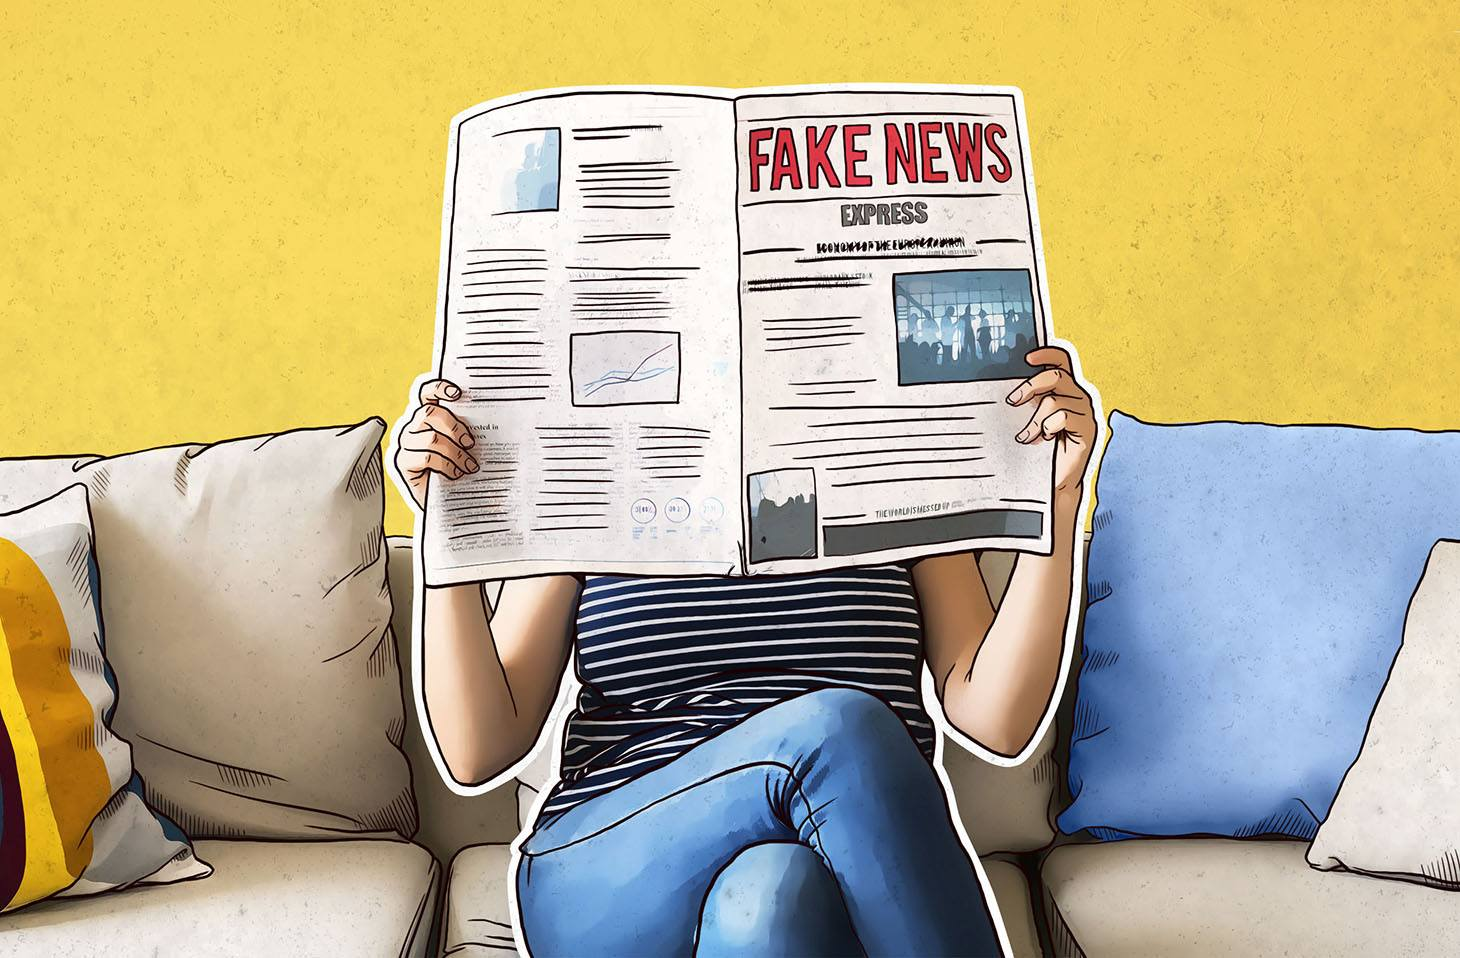

<center><div style="color:white;
            height: 40px;
            width: 300px;
            border-radius:20px 20px;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>Import Packages </b></p></div></center>
    
* **`gensim`: Represents documents as semantic vector**
* **`nltk`: Natural Language Toolkit to work with human language data**
* **`spacy`: Builds information extraction or natural language understanding systems**
* **`WordCloud`: Word Cloud or Tag Cloud generator**

In [1]:
!pip install nltk
!pip install spacy #For advanced Natural Language Processing
!pip install WordCloud
!pip install gensim #For unsupervised Topic Modeling and Natural Language Processing

<center><div style="color:white;
            height: 40px;
            width: 300px;
            border-radius:20px 20px;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>Import Libraries </b></p></div></center>

In [2]:
import nltk
nltk.download('punkt')
#Downloading stopwords
nltk.download('stopwords')

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk

#Obtaining additional stopwords from nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<center><div style="color:white;
            height: 40px;
            width: 300px;
            border-radius:20px 20px;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>Data Loading </b></p></div></center>

In [3]:
#Loading the data
df_true = pd.read_csv("/kaggle/input/true-fake-news-dataset/Fake_True/True.csv")
df_fake = pd.read_csv("/kaggle/input/true-fake-news-dataset/Fake_True/Fake.csv")

In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


<center><div style="color:white;
            height: 40px;
            width: 300px;
            border-radius:20px 20px;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>Data Integrating</b></p></div></center>
    
* **Target Column `isTrue` is created**
* **`isTrue` is set to 1 for real news and 0 for fake news**

In [6]:
#Adding a Target Class Column To Indicate whether the news is real or fake
df_true["isTrue"] = 1
df_true.head()

,title,text,subject,date,isTrue
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
df_fake["isTrue"] = 0
df_fake.head()

,title,text,subject,date,isTrue
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
#Concatenating Real and Fake news
df = pd.concat([df_true, df_fake]).reset_index(drop=True)
df

,title,text,subject,date,isTrue
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


**`reset_index() method` resets the index back to the default 0, 1, 2 etc indexes. By default, this method will keep the "old" idexes in a column named "index". To avoid this, `drop` parameter is used.**

In [9]:
#Checking if dataset is class-imbalanced or not
df['isTrue'].value_counts()

0    23481
1    21417
Name: isTrue, dtype: int64

* **<span style="color:#023e8a;">No of samples in 2 classes are 23481 and 21417</span>**<br>
* **<span style="color:#023e8a;">So, dataset is almost balanced</span>**

In [10]:
df.drop(columns=['date'], inplace=True)

**<span style="color:#023e8a;">date column is deleted, as it's unnecessarry for news detection</span>**

In [11]:
#Combining Title and Text together
df['original'] = df['title']+' '+df['text']
df.head()

,title,text,subject,isTrue,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


<center><div style="color:white;
            height: 40px;
            width: 300px;
            border-radius:20px 20px;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>Data Cleaning </b></p></div></center>

* **`stopwords` imported from `nltk.corpus` and extending using some words**
* **`STOPWORDS` imported from `gensim.parsing.preprocessing` is also used to remove stopwords**
* **`NLTK` library has 179 words in the stopword collection, whereas `Gensim` has 337 words**
* **Any tokens shorter than `min_len=2` characters and greater than `max_len=15` characters are discarded using `simple_preprocess()`**
* **`9276947` words are found by traversing through each word of each sentence**
* **`108704` unique words are obtained using `set` keyword**
* **`join()` method is used to combine words to sentence**

In [12]:
#Obtaining stopwords for English Language and Extending using some words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [13]:
#Remove stopwords and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        if token not in STOPWORDS and token not in stop_words:
            result.append(token)
            
    return result

In [14]:
#Apply the function to the dataframe
df['clean'] = df['original'].apply(preprocess)

In [15]:
#Show Original News
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [16]:
#Show Cleaned News after removing stop words
df['clean'][0]

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'cbs',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'big',
 'budget',
 'increase',
 'military',
 'spending',
 '

In [17]:
#Obtaining the total words in dataset
list_of_words = []
for i in df['clean']:
    for j in i:
        list_of_words.append(j)

In [18]:
#Total no of words present in the dataset
len(list_of_words)

9869568

In [19]:
#No of Unique Words present in the dataset
total_words = len(list(set(list_of_words)))
total_words

114594

In [20]:
#Joining the words into a Sentence
df['clean_joined'] = df['clean'].apply(lambda x:" ".join(x))
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot way republicans representative mark meadows speaking cbs face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want big budget increase military spending democrats want proportional increases non defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase non defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats s

<center><div style="color:white;
            height: 40px;
            width: 300px;
            border-radius:20px 20px;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>Visualization </b></p></div></center>
    
* **Two countplot are plotted, one for `Subject wise News Count`, another for `Real-Fake wise News Count`**     
* **The most frequent words are among the given text are visualized using `WordCloud`**

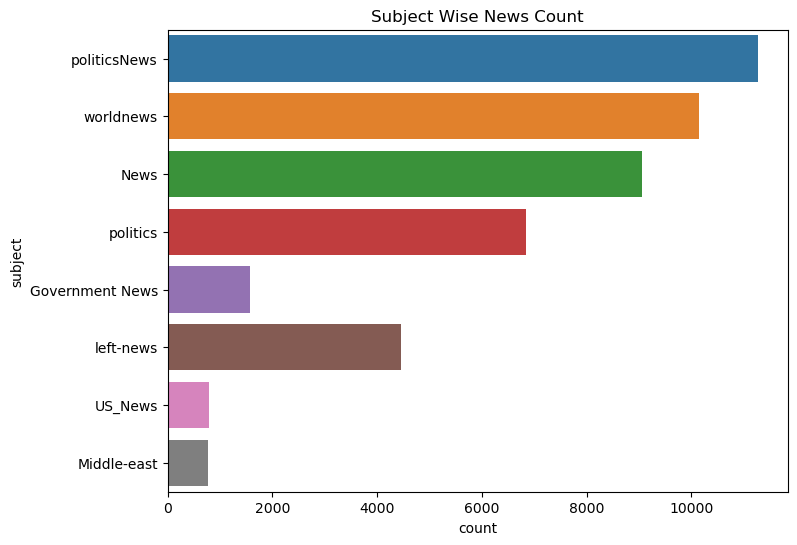

In [21]:
#Plotting the no of samples based on 'subject' 
plt.figure(figsize=(8,6))
plt.title("Subject Wise News Count")
sns.countplot(y = 'subject', data = df);

**<span style="color:#023e8a;">Here, `subject` wise</span>**

* **<span style="color:#023e8a;">`politicsNews` is in largest amount</span>**
* **<span style="color:#023e8a;">`US_News`, `Middle-east` are in shortest amount</span>**

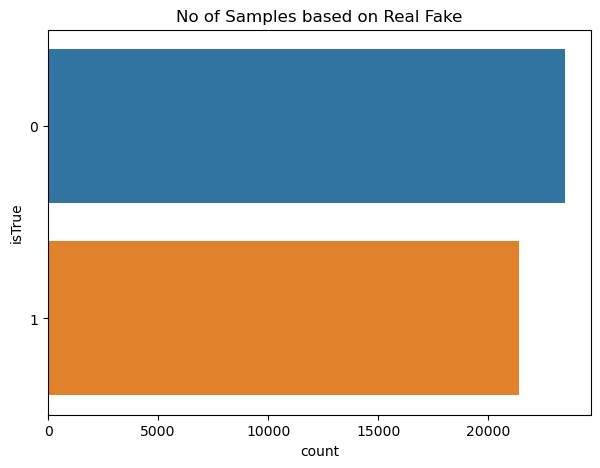

In [22]:
#Plotting the no of samples based on 'Real', 'Fake'
plt.figure(figsize=(7,5))
plt.title("No of Samples based on Real Fake")
sns.countplot(y = 'isTrue', data=df);

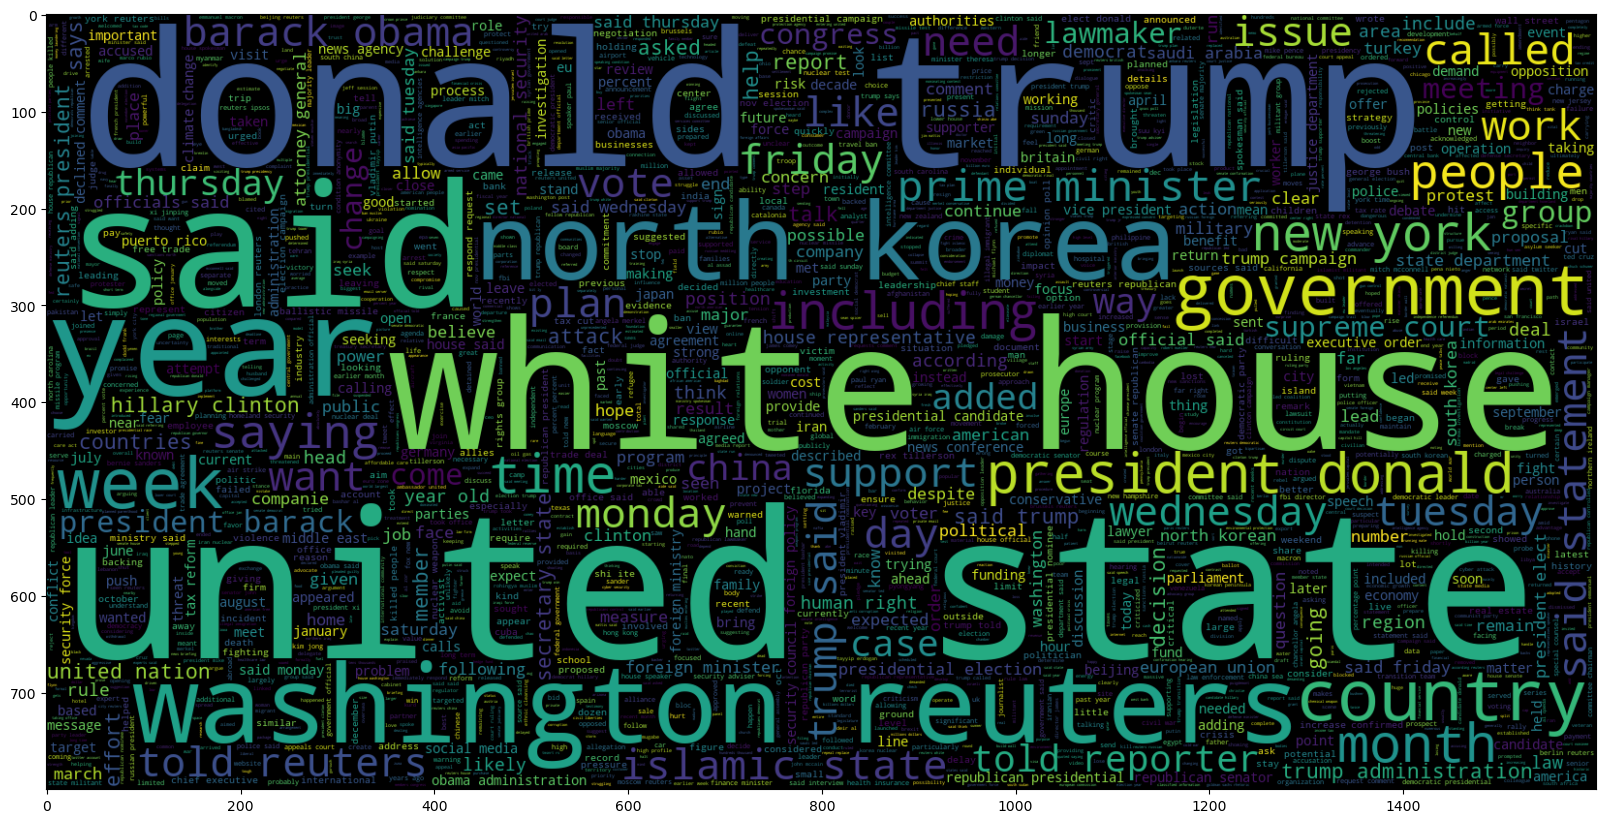

In [23]:
#Plotting the Word Cloud for Text that is Real
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=stop_words).generate(" ".join(df[df['isTrue']==1].clean_joined))
plt.imshow(wc, interpolation='bilinear');

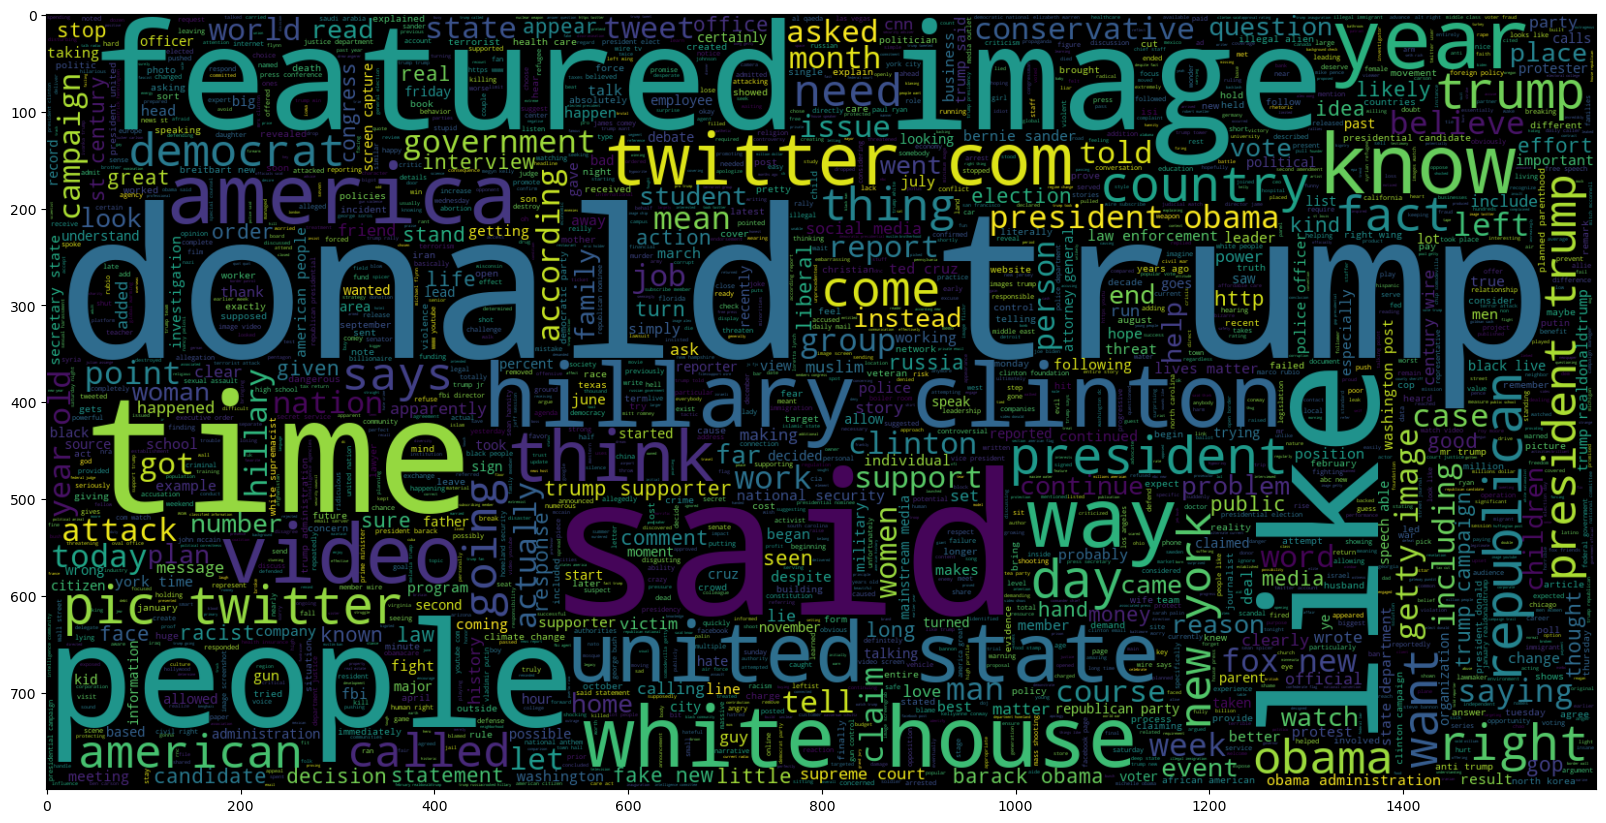

In [24]:
#Plotting the Word CLoud for Text that is Fake
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800, stopwords=stop_words).generate(" ".join(df[df['isTrue']==0].clean_joined))
plt.imshow(wc, interpolation='bilinear')

<center><div style="color:white;
            height: 40px;
            width: 300px;
            border-radius:20px 20px;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>Preparing the Data </b></p></div></center>
    
* **A text string is tokenized into individual words using `word_tokenize`**
* **`maxlen` is set to the largest no of tokens among texts**
* **Text Data is splitted into train-test as `80:20` ratio**
* **A set of text data is converted  into a sequence of `integers` using `texts_to_sequences`**
* **All sequences have been converted to the same length using `pad_sequences`**

In [25]:
#Determining the Maximum no of words In any Document Required to create Word Embeddings
maxlen = -1
for doc in df.clean_joined:
    tokens = word_tokenize(doc)
    if (maxlen<len(tokens)):
        maxlen = len(tokens)
        
print("The maximum no of words in any document is =", maxlen)

The maximum no of words in any document is = 4593


In [26]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['clean_joined'], df['isTrue'], test_size=0.2)

In [27]:
#Creating a Tokenizer to Tokenize the words and create sequence of tokenized words
tokenizer = Tokenizer(num_words=total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [28]:
print("The encoding for documents\n", df['clean_joined'][0], "\n is : \n\n", train_sequences[0])

The encoding for documents
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot way republicans representative mark meadows speaking cbs face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want big budget increase military spending democrats want proportional increases non defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase non defense discretionary spending percent meadows chairman small influential house freedom cauc

In [29]:
#Adding Padding
padded_train = pad_sequences(train_sequences, maxlen=40, padding='post', truncating='post')
padded_test = pad_sequences(test_sequences, maxlen=40, truncating='post')

In [30]:
for i,doc in enumerate(padded_train[:2]):
    print("The padded encoding for document", i+1, " is : ", doc)

The padded encoding for document 1  is :  [ 834 1286 1069   51  100  498  314   26   10   17   13   82 1114   51
  100  655  132 3414  870 1324 1069 1036   63  314 1391  684  379  793
 1219   71   55 7758  934  314 1679 1483 4382 5093 1220 2350]
The padded encoding for document 2  is :  [    7 34460  1315   113   777   268    95  2758  2443    86   136  1223
  1005   268    95  2262    63   268    95   103  1511   268    95   615
  1098  6196   534   746    24  1315     5 28863  3450  3158    34  4202
  2080  7488 11712   884]


<center><div style="color:white;
            height: 40px;
            width: 300px;
            border-radius:20px 20px;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>Building the Model </b></p></div></center>
    
* **`Sequential` model is built**
* **Integer inputs, which represent the index of words, are converted to `dense vector` of fixed size using `Embedding`**
* **Input Sequences are processed in both directions using `Bidirectional`**
* **A `Bidirectional LSTM` layer is created with `128` units**

In [31]:
# Sequential Model
model = Sequential()

# Embeddidng layer
model.add(Embedding(total_words, output_dim = 128))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         14668032  
                                                                 
 bidirectional (Bidirectiona  (None, 256)              263168    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14,964,225
Trainable params: 14,964,225
Non-trainable params: 0
_________________________________________________________________


<center><div style="color:white;
            height: 40px;
            width: 300px;
            border-radius:20px 20px;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>Training the Model </b></p></div></center>

In [32]:
# Training the model
history = model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 5)

Epoch 1/5
506/506 [==============================] - 111s 212ms/step - loss: 0.0381 - acc: 0.9836 - val_loss: 0.0056 - val_acc: 0.9983
Epoch 2/5
506/506 [==============================] - 112s 221ms/step - loss: 0.0020 - acc: 0.9996 - val_loss: 0.0070 - val_acc: 0.9989
Epoch 3/5
506/506 [==============================] - 111s 220ms/step - loss: 7.5026e-04 - acc: 0.9998 - val_loss: 0.0069 - val_acc: 0.9986
Epoch 4/5
506/506 [==============================] - 111s 220ms/step - loss: 2.0132e-04 - acc: 0.9999 - val_loss: 0.0084 - val_acc: 0.9972
Epoch 5/5
506/506 [==============================] - 112s 221ms/step - loss: 1.2147e-04 - acc: 1.0000 - val_loss: 0.0094 - val_acc: 0.9986


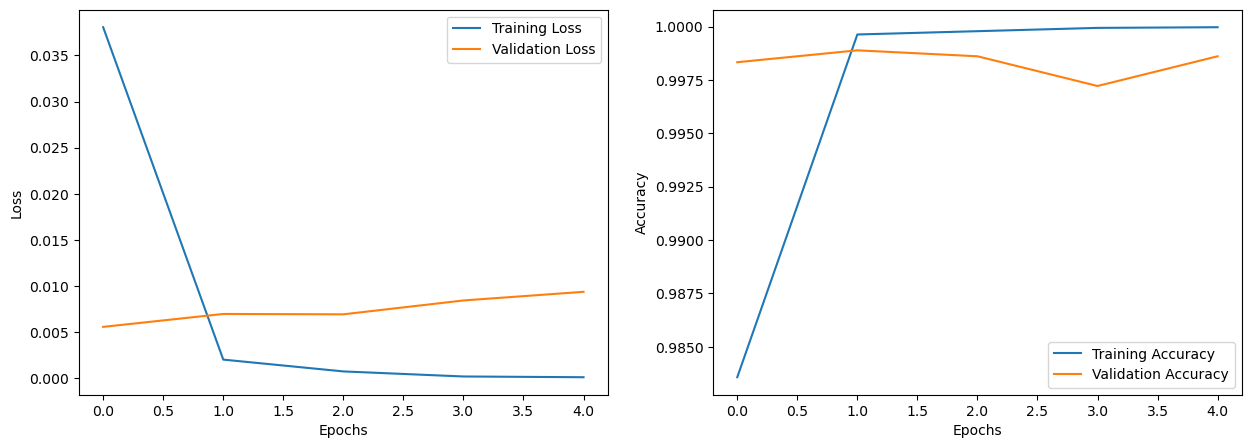

In [33]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history['loss'], label = "Training Loss")
plt.plot( history.history['val_loss'], label = "Validation Loss")
#plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history['acc'], label = "Training Accuracy")
plt.plot( history.history['val_acc'], label = "Validation Accuracy")
#plt.grid(True)
plt.legend()
plt.show()

<center><div style="color:white;
            height: 40px;
            width: 300px;
            border-radius:20px 20px;
            background-color:#e38e05;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding:4px;color:white;text-align:center; border-radius:20px 20px;"><b>Assessing Model Performance</b></p></div></center>
<br>    

**Model Performance is assessed using-**
* **`accuracy_score`**
* **`confusion_matrix`**
* **`classification_report`**

In [34]:
#Making Prediction
pred = model.predict(padded_test)

281/281 [==============================] - 8s 26ms/step


In [35]:
#If the predicted value is greater than 0.95 (i.e. more than 95%), ti is Real otherwise it is Fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.95:
        prediction.append(1)
    else:
        prediction.append(0)

In [36]:
#Getting the Accuracy
accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9920935412026726


<AxesSubplot:>

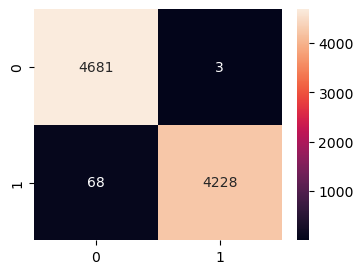

In [37]:
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (4, 3))
sns.heatmap(cm, fmt='d', annot = True)

* **<span style="color:#023e8a;">False Positive and False Negative is very less comapare to True Positive and True Negative</span>**
* **<span style="color:#023e8a;">So, confusion_matix indicates model is performing good</span>**

In [38]:
print(classification_report(list(y_test), prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4684
           1       1.00      0.98      0.99      4296

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



**<span style="color:#023e8a;">precision, recall, f1-score indicates model's performance is pretty well</span>**

### **<center><span style="color:#FEF1FE;background-color:#e38e05;border-radius: 5px;padding: 5px; font-size:140%;">Thanks for reading! Please feel free to provide your valuable insights:)</span></center>**